# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

df = pd.read_csv("C:\\Users\\alcid\\GitHub\\Portfolio\\EBAC\\Dados\\SINASC_RO_2019.csv")

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
# Função de passar bins 
def classificacao_quantitativa(x: float) -> str:
    if x<=3:
        return 'asfixia grave'
    elif (x == 4.0) |( x == 5.0):
        return 'asfixia moderada'
    elif (x == 6) | (x == 7):
        return 'asfixia leve'
    else:
        return 'normal'
    
    
df.loc[:,'APGAR5_cat'] = df['APGAR5'].apply(lambda x: classificacao_quantitativa(x))


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [3]:
def imagem_barras() -> None:
    """
    Função criada para imprimir a dispersão dos dados qualitativos.    
    """
    
    
    figura = plt.figure(figsize=(15,15)) # Criar imagem e tamanho da mesma.
    figura.suptitle('Gráfico de dispersão para cada categoria de APGAR5', fontsize=30) # Título
    figura.subplots_adjust(wspace=0.5, hspace=0.4) # Ajuste de distância entre os gráficos.
    
    
    tamanho = (2,2) # Quantidade de gráficos (3 linhas e 2 colunas)
    col = 0 # Contador.
    dt = df.copy() # Cópia de segurança.
    atributos = dt['APGAR5_cat'].unique()
    
    
    
    for pos_x in range(2): # Eixo X.
        for pos_y in range(2): # Eixo Y.
            
             # ---------- Configurações            
            nome_coluna =  atributos[col] # Selecionar qual coluna trabalhar.
            pos = (pos_x, pos_y) # Definir a posição da imagem.
            

            ax = plt.subplot2grid(tamanho, pos)
            
                
            # --------- Plot gráfica
            dt_filtro = dt.loc[dt['APGAR5_cat'] == nome_coluna]
            
            barra = sns.countplot(data=dt_filtro, y='GESTACAO', hue='SEXO', orient='h', palette='magma')
            comp = list()
            # --------- inserir informações no gráfico
            for i in barra.patches:
                x = int(i.get_width())
                y = i.get_xy()[1]
                comp.append(x)
                porcentagem = (x/(len(dt_filtro['APGAR5_cat'])))*100
                
                if porcentagem < 3:
                    text_pos = dt_filtro['APGAR5_cat'].value_counts().values.max()/18 
                else:
                    text_pos = x
                
                texto = f"{x}|{round(porcentagem,2)}%"
                barra.annotate(texto, xy = (text_pos, y +0.2), fontsize=10, verticalalignment='center')
            
            
            # --------- Ajustes de cada gráfico.
            barra.legend(loc='lower right')
            barra.set_title(atributos[col].capitalize(), fontsize=20, color='grey') # Título de cada gráfico.           
            barra.spines['top'].set_visible(False) # Desativar as barras da figura.
            barra.spines['right'].set_visible(False)
            barra.spines['left'].set_visible(False)
            barra.tick_params(axis='x', colors='darkgrey') # Trocar a cor dos números do eixo X.
            barra.set(xlabel=f'Frequência da gestação dividido\n por sexo e categoria {nome_coluna} ', 
                      ylabel='',
                      xlim = ([0,max(comp)*1.2])) # Aumentar o limite de cada barra em 20%
            
            col += 1  # Adicionar ao contador
            
    
    return plt.show()

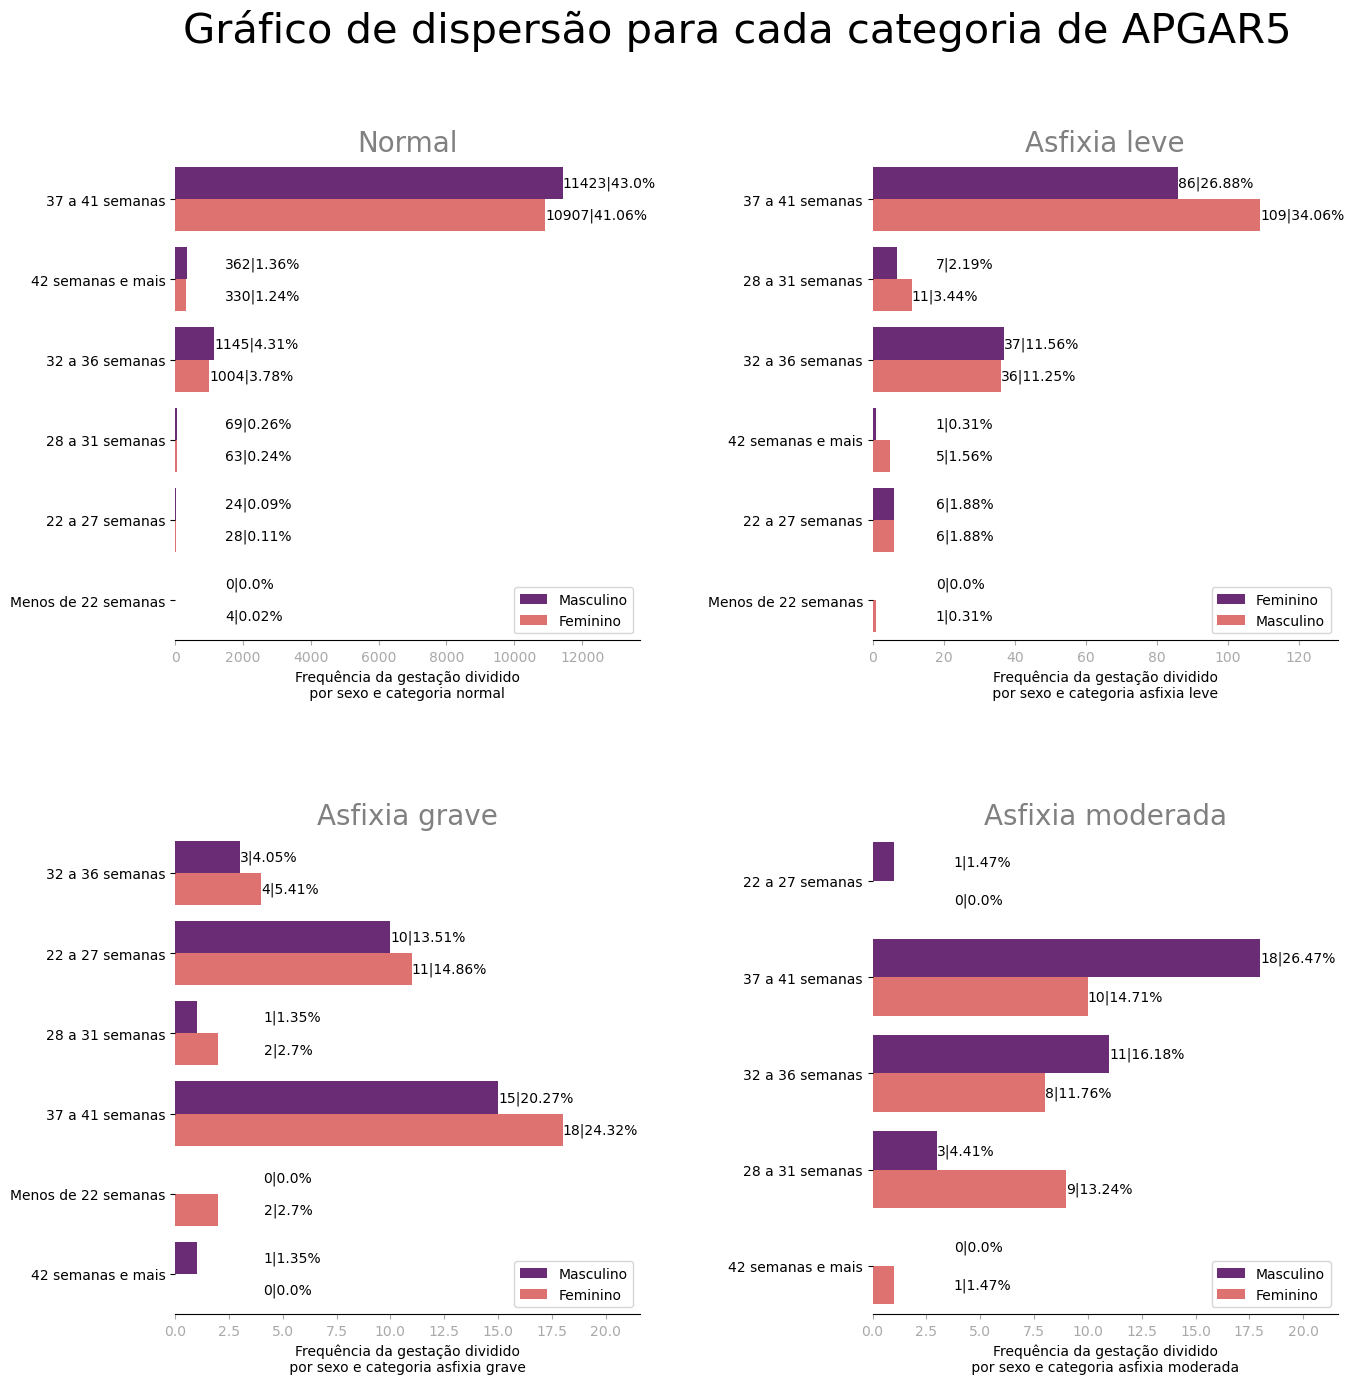

In [4]:
imagem_barras()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
freq = pd.crosstab(df['APGAR5_cat'], df['GESTACAO'])
display(freq)

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5_cat,,,,,,
asfixia grave,21,3,8,33,1,2
asfixia leve,12,18,73,196,6,1
asfixia moderada,1,12,19,28,1,0
normal,52,132,2149,22332,692,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
freq = round(freq.div(freq.sum(axis=1), axis=0)*100,2)
display(freq)

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5_cat,,,,,,
asfixia grave,30.88,4.41,11.76,48.53,1.47,2.94
asfixia leve,3.92,5.88,23.86,64.05,1.96,0.33
asfixia moderada,1.64,19.67,31.15,45.90,1.64,0.00
normal,0.21,0.52,8.47,88.06,2.73,0.02


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

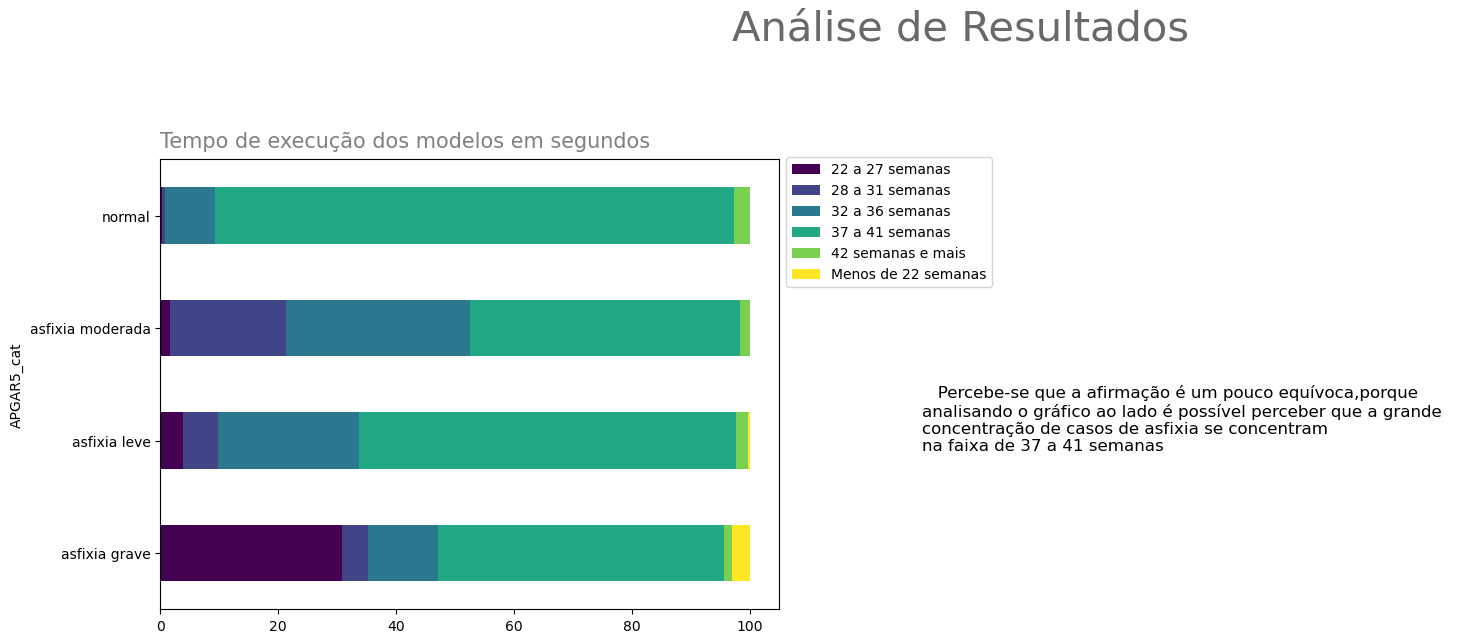

In [7]:
def barra_2():
    tamanho = (1,3) # O gráfico vai ter 3 posições
    figura = plt.figure(figsize=(20,6)) # Tamanho da figura
    figura.suptitle('Análise de Resultados', fontsize=30, color='dimgrey', y=1.1, horizontalalignment='center') # Título
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.6,
                    top=0.85,
                    wspace=0.6)
    pos = (0,0)
    ax = plt.subplot2grid(tamanho, pos, colspan=2) # Axis posição 1 e 2
    bar = freq.plot(kind='barh', stacked=True, colormap='viridis',ax = ax) # Plot das barras
    bar.legend(bbox_to_anchor=(1, 1.02)); # Posição da legenda do gráfico.
    plt.title('Tempo de execução dos modelos em segundos', horizontalalignment='left',
                  x=0, color='grey',fontsize=15, verticalalignment='bottom') #Título
    
    
    pos = (0,2)
    ax = plt.subplot2grid(tamanho, pos) # axis posição 3
    ax.axis('off') 
    texto = """   Percebe-se que a afirmação é um pouco equívoca,porque 
analisando o gráfico ao lado é possível perceber que a grande 
concentração de casos de asfixia se concentram 
na faixa de 37 a 41 semanas
            """
    plt.annotate(texto, xy=(0,.5), verticalalignment='top',color='black',fontsize=12)
    
    
    return plt.show()

barra_2()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

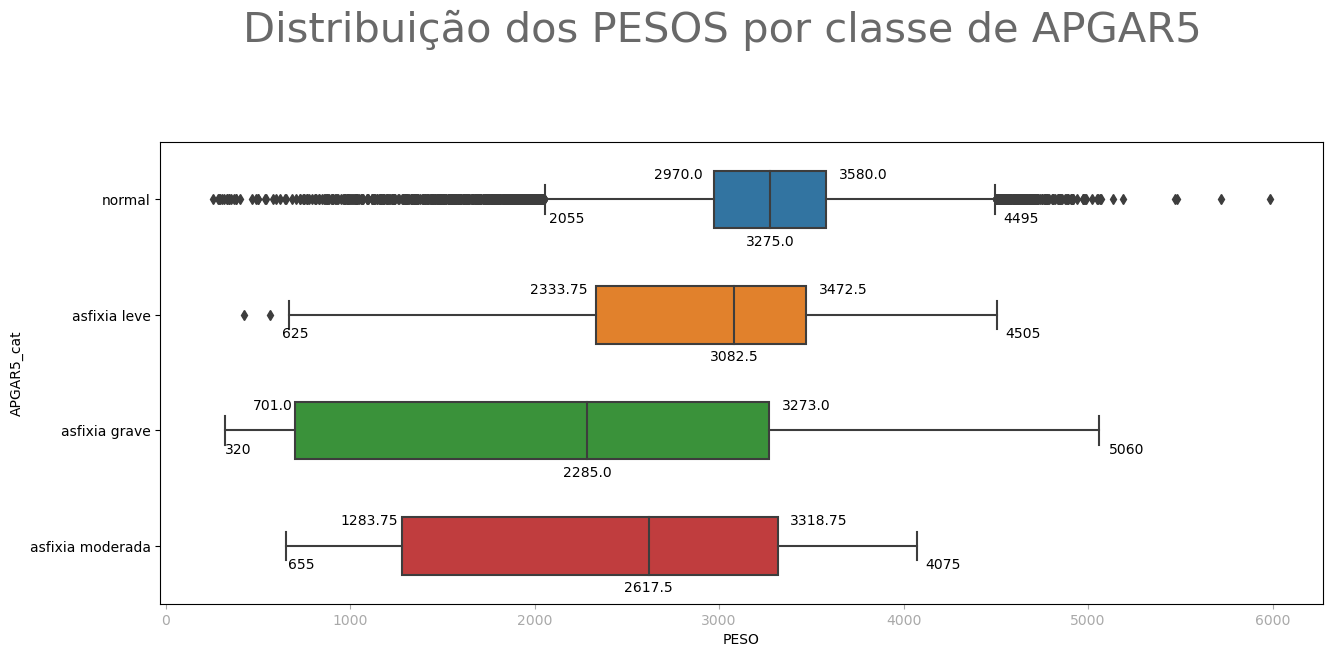

In [11]:
def correlation() -> None:
    """
    A função criada irá retornar um gráfico de caixa com a distribuição do peso dos bebês por
    cada classe de APGAR5.
    """
    
    
    # ------------ Configuração
    figura = plt.figure(figsize=(15,6))
    figura.suptitle('Distribuição dos PESOS por classe de APGAR5', fontsize=30, color='dimgrey', y=1.1, horizontalalignment='center')
    #plt.subplots_adjust()
    c = 0
    # ------------ Correlação numérica.
    box = sns.boxplot(x= df['PESO'], y=df['APGAR5_cat'], orient='h',width=.5)

    # -======== Função para plotar o texto no gráfico.
    for coluna in df['APGAR5_cat'].unique():
        dt = df.loc[df['APGAR5_cat'] == coluna,'PESO']
        quantiles = df.loc[df['APGAR5_cat'] == coluna, 'PESO'].quantile([0.25, 0.75]).values.tolist() # Separação dos quantiles.
        LI = quantiles[0] - ((quantiles[1] - quantiles[0])*1.5) # Definir limite inferior
        LS = quantiles[1] + ((quantiles[1] - quantiles[0])*1.5) # Definir limte superior
        if LI < dt.min(): # Loop que vai reposicionar em caso de valores abaixo/acima do cálculado.
            LI = dt.min()
        if LS > dt.max():
            LS = dt.max()
        L = 0
        posse = ['right', 'left'] # Reajustar a posição no boxplot.
        for ix in [int(LI),int(LS)]: # Plotar no gráfico.
            box.annotate(round(ix,2), xy=(ix*1.01,c +0.20 ), fontsize=10, color='black')
        for ix,poss in zip(quantiles,posse):
            if L == 0:
                a = 0.98
            else:
                a = 1.02
            box.annotate(round(ix,2), xy=(ix*a,c -0.18), fontsize=10, color='black',horizontalalignment=poss)
            L+=1
        box.annotate(round(dt.median(),2), xy=(dt.median(), c+0.40),                     
                     fontsize=10, color='black',horizontalalignment='center')
        c += 1

    box.tick_params(axis='x', colors='darkgrey')
    
    return plt.show()


correlation()